In [1]:
%load_ext autoreload
%autoreload 2 
# !apt-get install -y xvfb

In [124]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


## Data Loading

In [4]:
df = pd.read_excel(os.path.abspath("/home/sneha/airway_tree_pilot.xlsx"), sheet_name=0)

In [6]:
df.drop(columns = ["manufacturer", "model"], inplace=True)

In [7]:
df.describe()


,idno,startbpid,endbpid,centerlinelength,angle,dircosx,dircosy,dircosz,avginnerarea,generation,weibel_generation
count,7.768300e+04,77683.000000,77683.000000,77683.000000,77454.000000,77683.000000,77683.000000,77683.000000,77683.000000,77683.000000,77683.000000
mean,5.986778e+06,149.658226,197.128509,10.614453,143.201617,-0.021328,0.056368,0.138202,11.161638,6.539384,7.338839
std,1.832951e+06,121.756964,130.566550,9.629416,24.407202,0.552013,0.542999,0.614584,25.017431,1.918851,2.273523
min,3.011950e+06,-1.000000,1.000000,0.498047,4.410540,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,4.017080e+06,51.000000,92.000000,4.138575,132.688500,-0.476731,-0.381630,-0.392263,4.149160,5.000000,6.000000
50%,7.012039e+06,120.000000,180.000000,8.742300,149.928000,0.000000,0.061056,0.229416,6.168230,7.000000,7.000000
75%,8.010528e+06,220.000000,280.000000,14.169850,160.462500,0.436436,0.497468,0.704271,10.071250,8.000000,9.000000
max,8.023336e+06,744.000000,747.000000,128.734000,180.000000,1.000000,1.000000,1.000000,2343.240000,16.000000,17.000000


### GENERATE AND SAVE SOME TEST DATA


In [19]:
mini_df = df.loc[df.idno == 3011950]


In [54]:
mini_df.sort_values(by=[ "endbpid"]).to_csv("visualisation_test_3011950.csv")

In [55]:
# testing for lpy
test_df = pd.read_csv("visualisation_test_3011950.csv")
display(test_df)

,Unnamed: 0,idno,anatomicalname,startbpid,endbpid,centerlinelength,angle,dircosx,dircosy,dircosz,avginnerarea,lobes,generation,weibel_generation
0,0,3011950,Trachea,-1,1,82.03930,NaN,-0.012990,0.194850,0.980747,237.70400,CEN,0,0
1,1,3011950,RMB,1,6,23.64560,144.807,-0.498729,-0.142494,0.854965,140.56700,CEN,1,1
2,2,3011950,LMB,1,7,50.79000,127.043,0.787070,0.049192,0.614899,97.70850,CEN,1,1
3,6,3011950,LLB6,7,10,8.43446,165.459,0.745356,0.298142,0.596285,146.80000,LLL,2,2
4,5,3011950,LUL,7,11,12.09850,115.366,0.832050,-0.443760,-0.332820,60.54330,LUL,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,280,3011950,-,284,289,18.72950,149.123,0.306741,-0.083657,0.948109,4.42925,RLL,8,11
281,281,3011950,-,287,290,17.36870,155.481,-0.145479,0.800132,0.581914,4.77264,RLL,9,12
282,282,3011950,-,287,291,14.62450,170.705,0.272681,0.506408,0.818044,7.91250,RLL,9,12
283,283,3011950,-,288,292,15.79030,170.621,-0.172005,0.412813,0.894427,7.19732,RLL,9,12


In [42]:
# convert to numpy
for i in sorted(list(test_df.startbpid.unique())):
    n = (test_df.startbpid == i).sum()
    print(f"For parent {i}, there are {n} child branches")
    children = test_df[test_df.startbpid == i]
    for j in range(len(children)):
        child_vector = children.iloc[j][["dircosx", "dircosy", "dircosz"]].values
        child_l = children.iloc[j]["centerlinelength"]
        child_r = np.sqrt(children.iloc[j]["avginnerarea"]/np.pi)
        print(child_vector, child_l, child_r)
    

For parent -1, there are 1 child branches
[-0.01299 0.19485 0.980747] 82.0393 8.698478785709131
For parent 1, there are 2 child branches
[-0.498729 -0.142494 0.854965] 23.6456 6.689085570628986
[0.78707 0.0491919 0.614899] 50.79 5.576879191285115
For parent 6, there are 2 child branches
[-0.904762 -0.190476 -0.380952] 13.9716 4.389532741927602
[-0.26082 0.026082 0.965035] 19.755 5.876624268372463
For parent 7, there are 2 child branches
[0.745356 0.298142 0.596285] 8.43446 6.83578022553245
[0.83205 -0.44376 -0.33282] 12.0985 4.389935185420292
For parent 10, there are 2 child branches
[0.40161 0.883541 -0.240966] 8.46466 2.8165268488879307
[0.57735 0.11547 0.80829] 9.92149 3.57890583881658
For parent 11, there are 2 child branches
[0.751809 -0.40482 0.520483] 11.1299 3.0148424731652077
[0.498464 -0.387694 -0.775388] 10.5259 3.4914903260803034
For parent 14, there are 2 child branches
[0.596285 0.745356 -0.298142] 4.5265 3.101262437138961
[-0.457496 0.762493 -0.457496] 4.29089 3.28252171

In [51]:
start_id = 1

def get_child_info(start_id):
    try:
        children = test_df[test_df.startbpid == start_id]
        nb_axes = len(children)
        child_vectors = []
        child_lengths = []
        child_radii = []
        child_endids = []
        for j in range(nb_axes):
            child_end = children.iloc[j]["endbpid"]
            child_vector = children.iloc[j][["dircosx", "dircosy", "dircosz"]].values
            child_l = children.iloc[j]["centerlinelength"]
            child_r = np.sqrt(children.iloc[j]["avginnerarea"]/np.pi)
            child_vectors.append(child_vector)
            child_lengths.append(child_l)
            child_radii.append(child_r)
            child_endids.append(child_end)
        
    except:
        print(f"There is no start branch id {start_id}")
    return nb_axes, child_vectors, child_lengths, child_radii, child_endids



print(get_child_info(1))
print(start_id)

(2, [array([-0.498729, -0.142494, 0.854965], dtype=object), array([0.78707, 0.0491919, 0.614899], dtype=object)], [23.6456, 50.79], [6.689085570628986, 5.576879191285115], [6, 7])
1


In [ ]:
A(id)

In [56]:
nbiter = test_df.startbpid.nunique()

In [70]:
test_df.weibel_generation.min()

colour_scale_per_gen = 255/(test_df.weibel_generation.max()-test_df.weibel_generation.min())
round(colour_scale_per_gen)

21

In [ ]:
cmap = {
    0: (0,0,0),
    1: (1, 37, 111),
    2: (180, 60, 164),
    3: (247, 156, 238),
    4: (23, 149, 91),
    5: (131, 224, 193)
}

## Data Exploration 

### Segment Analysis

In [8]:
print("There are 227 participants, each participant has on average 342 \pm 110 branch segments")

df.groupby("idno").agg(
    {
        "anatomicalname":"count"
    }
).rename(
    columns = {
        "anatomicalname":"num_branch_segments"
    }
).sort_values(
    by="num_branch_segments",
    ascending=False
).describe().round(0).astype(int)



There are 227 participants, each participant has on average 342 \pm 110 branch segments


,num_branch_segments
count,227
mean,342
std,110
min,98
25%,264
50%,331
75%,408
max,744


In [46]:
# Looking for orphan branches (check every branch has a parent)
# check if every startbpid (parent) is in the list of endbpids for that idno --> ie. the parent of the branch is in the tree. 
#If the parent is not in the list of segments (endbpid) then the branch is an orphan.
orphan_check = pd.concat([df[["idno"]].copy(), df.apply(
    lambda x: x.startbpid in df[df.idno == x.idno]['endbpid'].values,
axis=1)], axis=1)

# concatenate
orphan_check.rename({0:"has_parent"}, axis=1, inplace=True)

# groupby id number and check how branches have parents vs number of branches per idno
per_id = orphan_check.groupby("idno").agg({"has_parent":lambda x:sum(x) + 1, "idno":"count"})

check = (per_id.has_parent == per_id.idno)

print(f"{100*check.sum()/len(check)}% of segments have valid parents! ({100-100*check.sum()/len(check)}% orphans)")

100.0% of segments have valid parents! (0.0% orphans)


### Generation Analysis

In [7]:
print("Number of weibel generations per participant")

weibel = df.groupby("idno").agg(
    {
        "weibel_generation":["max", "mean"]
    }
)






new_cols = [first+"_"+second for (first, second) in weibel.columns]
weibel.columns = new_cols
weibel.describe().round().astype(int)

Number of weibel generations per participant


,weibel_generation_max,weibel_generation_mean
count,227,227
mean,13,7
std,1,1
min,9,5
25%,12,7
50%,13,7
75%,14,8
max,17,9


Discrepancy between the vida labelled generation vs the weibel_generation given in the df.
VIDA: 6.54 \pm 1.92
WEIBEL:7.34 \pm 2.27  


<AxesSubplot:xlabel='generation', ylabel='weibel_generation'>

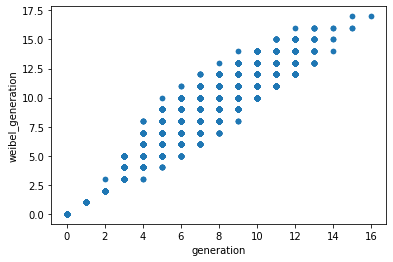

In [53]:
# weibel gen vs gen labelled by vida --> ASK what this is??? 
print(f"Discrepancy between the vida labelled generation vs the weibel_generation given in the df.\nVIDA: {df.generation.mean():.2f} \pm {df.generation.std():.2f}\nWEIBEL:{df.weibel_generation.mean():.2f} \pm {df.weibel_generation.std():.2f}  ")
df.plot.scatter(x="generation", y="weibel_generation")

### Label Analysis

69737 branch segments have empty entries in anatomicalname
770 branch segments have the word 'unnamed' in their anatomicalname entry (261 unique types of 'unnamed-X')
76913 branch segments have a proper (not unnamed) anatomicalname entry (33 unique types of valid label)


Text(0, 0.5, '# segments')

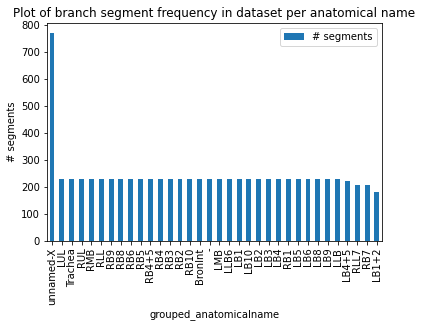

In [133]:
print(f"{(df['anatomicalname']=='-').sum()} branch segments have empty entries in anatomicalname")
print(f"{(df['anatomicalname'].apply(lambda x: 'unnamed' in x.lower())).sum()} branch segments have the word 'unnamed' in their anatomicalname entry ({df[df['anatomicalname'].str.contains('unnamed')].anatomicalname.nunique()} unique types of 'unnamed-X')")
print(f"{(df['anatomicalname'].apply(lambda x: 'unnamed' not in x.lower())).sum()} branch segments have a proper (not unnamed) anatomicalname entry ({df[~df['anatomicalname'].str.contains('unnamed')].anatomicalname.nunique()} unique types of valid label)") 
label_freq = df.groupby('anatomicalname').agg({'idno':'nunique'}).sort_values(by='idno', ascending=False).rename({"idno":"# segments"}, axis=1).reset_index()
label_freq["grouped_anatomicalname"] = label_freq.anatomicalname.apply(lambda x: x if 'unnamed' not in x else 'unnamed-X')
f, ax = plt.subplots()
label_freq[["grouped_anatomicalname","# segments"]].groupby("grouped_anatomicalname").agg("sum").reset_index().sort_values(by="# segments", ascending=False).plot.bar(x="grouped_anatomicalname", y="# segments", ax=ax)
plt.title("Plot of branch segment frequency in dataset per anatomical name")
plt.ylabel("# segments")
# what is unnamed vs just empty entry in the csv?

In [134]:
print("All branches start at trachea and end on segment number 350\pm 113")
df.groupby("idno").agg({"startbpid":"min", "endbpid":max}).describe().round()

All branches start at trachea and end on segment number 350\pm 113


,startbpid,endbpid
count,227.0,227.0
mean,-1.0,350.0
std,0.0,113.0
min,-1.0,101.0
25%,-1.0,270.0
50%,-1.0,335.0
75%,-1.0,414.0
max,-1.0,747.0


count    69251.000000
mean        12.642439
std         26.112776
min          1.297890
25%          4.787525
50%          6.711200
75%         10.898450
max       2343.240000
Name: avginnerarea, dtype: float64

/tmp/ipykernel_3376/2874537006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier["log_diameter"] = np.log(2*np.sqrt(df_no_outlier["avginnerarea"]/np.pi))


<AxesSubplot:xlabel='weibel_generation'>

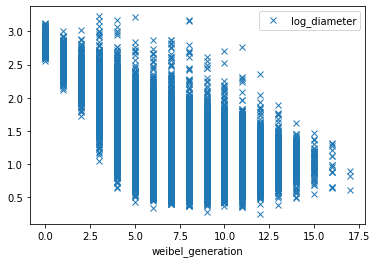

In [10]:
display(df[df.avginnerarea > 0].avginnerarea.describe())
# group by weibel dim then plot the histogram
# excluding 3 outliers above 500 CSA --> Question error?
df_no_outlier = df[(df.avginnerarea > 0) & (df.avginnerarea < 500)]
df_no_outlier["log_diameter"] = np.log(2*np.sqrt(df_no_outlier["avginnerarea"]/np.pi))
df_no_outlier.plot(y="log_diameter", x="weibel_generation", style="x")

In [11]:
np.polyfit(x=df_no_outlier.weibel_generation.values, y= df_no_outlier.log_diameter.values, deg=1) # outputs coeff of HIGHEST degree first
# not really woking --> could group by person, take avg per person per generation and tyr there maybe less noise?
# generate plots on the line


# regression = ols(x=df_no_outlier.weibel_generation, y=df_no_outlier.log_diameter)
# display(regression.summary) # slicing to only use last 30 points
# data = pd.DataFrame(index=x, data={'y': y, 'trend': trend})
# data.plot()

# df_no_outlier.plot(y="log_diameter", x="weibel_generation", style="x")


array([-0.09263583,  1.82570835])